# 01. 데이터 전처리 (Data Preprocessing)

## 📌 이 노트북의 목적
- 원본 CSV 파일을 읽어서 분석과 머신러닝에 사용할 수 있는 깨끗한 형태로 변환합니다
- 결측값(빈 값)을 처리하고, 데이터 타입을 올바르게 변환합니다
- 전처리가 완료된 데이터를 저장하여 다음 단계에서 사용합니다

---

## 1. 라이브러리 설치 및 임포트

### 라이브러리란?
- 다른 사람들이 미리 만들어놓은 유용한 코드 모음입니다
- 우리가 직접 복잡한 기능을 만들지 않아도, 라이브러리를 불러와서 쉽게 사용할 수 있습니다

### 주요 라이브러리 역할:
- **pandas**: 엑셀처럼 표 형태의 데이터를 다룹니다
- **numpy**: 숫자 계산을 빠르게 처리합니다
- **matplotlib & seaborn**: 그래프를 그립니다
- **warnings**: 불필요한 경고 메시지를 숨깁니다

In [35]:
# ============================================================
# 1-1. 기본 라이브러리 임포트 (Import)
# ============================================================
# import는 라이브러리를 불러오는 명령어입니다
# as는 라이브러리에 별명을 붙여서 짧게 쓸 수 있게 해줍니다

import pandas as pd              # pandas를 pd라는 이름으로 사용
import numpy as np               # numpy를 np라는 이름으로 사용
import matplotlib.pyplot as plt  # matplotlib의 pyplot을 plt로 사용
import seaborn as sns            # seaborn을 sns로 사용
import warnings                  # 경고 메시지 관리
from datetime import datetime    # 날짜/시간 처리
import re                        # 정규표현식 (텍스트 패턴 찾기)

# 경고 메시지 숨기기 (너무 많은 경고가 나오면 화면이ㄴ 복잡해져서)
warnings.filterwarnings('ignore')

# 그래프를 노트북 안에 직접 표시하도록 설정
%matplotlib inline

# pandas 출력 옵션 설정
pd.set_option('display.max_columns', None)    # 모든 컬럼 보기
pd.set_option('display.max_rows', 100)        # 최대 100행까지 보기
pd.set_option('display.width', None)          # 너비 제한 없음

print("✅ 라이브러리 임포트 완료!")
print(f"📦 pandas 버전: {pd.__version__}")
print(f"📦 numpy 버전: {np.__version__}")

✅ 라이브러리 임포트 완료!
📦 pandas 버전: 2.3.3
📦 numpy 버전: 2.2.6


---
## 2. 데이터 로드 (Data Loading)

### CSV 파일이란?
- Comma-Separated Values의 약자입니다
- 엑셀과 비슷하지만 더 가벼운 파일 형식입니다
- 각 값이 쉼표(,)로 구분되어 있습니다

### 우리가 가진 데이터:
1. **product_info.csv**: 제품 정보 (약 8,500개)
2. **reviews_*.csv**: 리뷰 데이터 (5개 파일로 나뉘어진 총 110만 개)

In [11]:
# ============================================================
# 2-1. 제품 데이터 로드
# ============================================================
# pd.read_csv()는 CSV 파일을 읽어서 DataFrame(표)으로 만듭니다

print("📂 제품 데이터를 불러오는 중...")

# CSV 파일을 읽어서 products_df라는 이름의 DataFrame에 저장
# DataFrame은 pandas의 핵심 자료구조로, 엑셀 시트처럼 행과 열로 구성됩니다
products_df = pd.read_csv('product_info.csv')

# 불러온 데이터의 크기 확인 (행 개수, 열 개수)
print(f"✅ 제품 데이터 로드 완료!")
print(f"   - 행(row) 개수: {products_df.shape[0]:,}개 (제품 개수)")
print(f"   - 열(column) 개수: {products_df.shape[1]}개 (특성 개수)")
print(f"   - 총 데이터 크기: {products_df.shape[0] * products_df.shape[1]:,}개 셀")

📂 제품 데이터를 불러오는 중...
✅ 제품 데이터 로드 완료!
   - 행(row) 개수: 8,494개 (제품 개수)
   - 열(column) 개수: 27개 (특성 개수)
   - 총 데이터 크기: 229,338개 셀


In [12]:
# ============================================================
# 2-2. 리뷰 데이터 로드 및 병합
# ============================================================
# 리뷰 데이터는 5개 파일로 나뉘어져 있으므로 모두 읽어서 하나로 합쳐야 합니다

print("📂 리뷰 데이터를 불러오는 중...")
print("   (데이터가 많아서 시간이 조금 걸릴 수 있습니다)\n")

# 리뷰 파일 이름 리스트
# 리스트는 여러 값을 순서대로 저장하는 자료구조입니다 (대괄호 [] 사용)
review_files = [
    'reviews_0-250.csv',
    'reviews_250-500.csv',
    'reviews_500-750.csv',
    'reviews_750-1250.csv',
    'reviews_1250-end.csv'
]

# 빈 리스트 생성: 각 파일에서 읽은 데이터를 임시로 저장할 공간
review_dfs = []

# for 반복문: 리스트의 각 항목에 대해 반복 실행
for i, file in enumerate(review_files, 1):
    # enumerate()는 인덱스(순서 번호)와 값을 동시에 반환합니다
    # i는 1부터 시작하는 순서 번호, file은 파일 이름
    
    print(f"   [{i}/5] {file} 읽는 중...", end=" ")
    
    # CSV 파일 읽기
    # low_memory=False: 큰 파일을 읽을 때 메모리 경고를 피하기 위한 옵션
    df = pd.read_csv(file, low_memory=False)
    
    # 읽은 DataFrame을 리스트에 추가
    review_dfs.append(df)
    
    print(f"완료! ({df.shape[0]:,}개 리뷰)")

print("\n📦 모든 리뷰 파일을 하나로 합치는 중...")

# pd.concat()은 여러 DataFrame을 하나로 합치는 함수입니다
# ignore_index=True: 기존 인덱스를 무시하고 새로운 인덱스를 0부터 다시 부여
reviews_df = pd.concat(review_dfs, ignore_index=True)

# 중간 변수 삭제 (메모리 절약)
del review_dfs

print(f"\n✅ 리뷰 데이터 병합 완료!")
print(f"   - 총 리뷰 개수: {reviews_df.shape[0]:,}개")
print(f"   - 컬럼 개수: {reviews_df.shape[1]}개")

📂 리뷰 데이터를 불러오는 중...
   (데이터가 많아서 시간이 조금 걸릴 수 있습니다)

   [1/5] reviews_0-250.csv 읽는 중... 완료! (602,130개 리뷰)
   [2/5] reviews_250-500.csv 읽는 중... 완료! (206,725개 리뷰)
   [3/5] reviews_500-750.csv 읽는 중... 완료! (116,262개 리뷰)
   [4/5] reviews_750-1250.csv 읽는 중... 완료! (119,317개 리뷰)
   [5/5] reviews_1250-end.csv 읽는 중... 완료! (49,977개 리뷰)

📦 모든 리뷰 파일을 하나로 합치는 중...

✅ 리뷰 데이터 병합 완료!
   - 총 리뷰 개수: 1,094,411개
   - 컬럼 개수: 19개


---
## 3. 데이터 탐색 (Data Exploration)

### 데이터를 처음 만났을 때 해야 할 일:
1. 데이터가 어떻게 생겼는지 확인 (.head())
2. 어떤 컬럼(열)들이 있는지 확인 (.columns)
3. 각 컬럼의 데이터 타입 확인 (.info())
4. 기본 통계량 확인 (.describe())
5. 결측값(빈 값) 확인 (.isnull())

In [13]:
# ============================================================
# 3-1. 제품 데이터 미리보기
# ============================================================

print("="*80)
print("📊 제품 데이터 미리보기")
print("="*80)

# .head(n): 데이터프레임의 처음 n개 행을 보여줍니다 (기본값은 5)
# 데이터가 어떻게 생겼는지 확인하는 가장 기본적인 방법입니다
products_df.head()

📊 제품 데이터 미리보기


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [14]:
# ============================================================
# 3-2. 제품 데이터 정보 확인
# ============================================================

print("📋 제품 데이터 기본 정보")
print("="*80)

# .info(): 데이터프레임의 전체 구조를 보여줍니다
# - 각 컬럼의 이름
# - 비어있지 않은 값의 개수
# - 데이터 타입 (int, float, object 등)
# - 메모리 사용량
products_df.info()

📋 제품 데이터 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int6

In [15]:
# ============================================================
# 3-3. 제품 데이터 통계량 확인
# ============================================================

print("📈 제품 데이터 기술 통계량")
print("="*80)

# .describe(): 숫자형 컬럼들의 기본 통계량을 보여줍니다
# - count: 데이터 개수
# - mean: 평균
# - std: 표준편차 (데이터가 얼마나 퍼져있는지)
# - min: 최솟값
# - 25%, 50%, 75%: 사분위수 (데이터를 4등분 했을 때의 값)
# - max: 최댓값
products_df.describe()

📈 제품 데이터 기술 통계량


,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


In [16]:
# ============================================================
# 3-4. 리뷰 데이터 미리보기
# ============================================================

print("="*80)
print("📊 리뷰 데이터 미리보기")
print("="*80)

reviews_df.head()

📊 리뷰 데이터 미리보기


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [17]:
# ============================================================
# 3-5. 리뷰 데이터 정보 확인
# ============================================================

print("📋 리뷰 데이터 기본 정보")
print("="*80)

reviews_df.info()

📋 리뷰 데이터 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type   

---
## 4. 결측값 분석 및 처리

### 결측값(Missing Value)이란?
- 데이터가 없는 빈 칸을 말합니다 (NaN, None, 빈 문자열 등)
- 엑셀에서 빈 셀과 같은 개념입니다

### 결측값이 생기는 이유:
- 사용자가 입력하지 않음 (예: 피부타입을 선택하지 않음)
- 데이터 수집 과정에서 오류 발생
- 해당 항목이 적용되지 않음

### 결측값 처리 방법:
1. **삭제**: 결측값이 있는 행을 제거
2. **대체**: 평균, 중간값, 최빈값 등으로 채우기
3. **유지**: 결측값도 하나의 정보로 활용

In [18]:
# ============================================================
# 4-1. 제품 데이터 결측값 확인
# ============================================================

print("🔍 제품 데이터의 결측값 분석")
print("="*80)

# .isnull(): 각 셀이 비어있으면 True, 값이 있으면 False를 반환
# .sum(): True를 1로 세서 각 컬럼별 결측값 개수를 계산
missing_products = products_df.isnull().sum()

# 결측값 비율 계산 (백분율)
# len(products_df)는 전체 행의 개수
missing_products_percent = (missing_products / len(products_df)) * 100

# DataFrame으로 만들어서 보기 좋게 정리
# pd.DataFrame()은 새로운 데이터프레임을 만듭니다
missing_df = pd.DataFrame({
    '결측값 개수': missing_products,
    '결측값 비율(%)': missing_products_percent
})

# 결측값이 있는 컬럼만 필터링 (결측값 개수 > 0)
# [조건]은 조건에 맞는 행만 선택합니다
missing_df = missing_df[missing_df['결측값 개수'] > 0]

# 결측값이 많은 순서대로 정렬
# .sort_values(): 특정 컬럼을 기준으로 정렬
# ascending=False: 내림차순 정렬 (큰 값부터)
missing_df = missing_df.sort_values('결측값 개수', ascending=False)

# 소수점 2자리까지만 표시
missing_df = missing_df.round(2)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✅ 결측값이 없습니다!")

🔍 제품 데이터의 결측값 분석
                    결측값 개수  결측값 비율(%)
sale_price_usd        8224      96.82
value_price_usd       8043      94.69
variation_desc        7244      85.28
child_max_price       5740      67.58
child_min_price       5740      67.58
highlights            2207      25.98
size                  1631      19.20
variation_value       1598      18.81
variation_type        1444      17.00
tertiary_category      990      11.66
ingredients            945      11.13
reviews                278       3.27
rating                 278       3.27
secondary_category       8       0.09


In [19]:
# ============================================================
# 4-2. 리뷰 데이터 결측값 확인
# ============================================================

print("🔍 리뷰 데이터의 결측값 분석")
print("="*80)

missing_reviews = reviews_df.isnull().sum()
missing_reviews_percent = (missing_reviews / len(reviews_df)) * 100

missing_df_reviews = pd.DataFrame({
    '결측값 개수': missing_reviews,
    '결측값 비율(%)': missing_reviews_percent
})

missing_df_reviews = missing_df_reviews[missing_df_reviews['결측값 개수'] > 0]
missing_df_reviews = missing_df_reviews.sort_values('결측값 개수', ascending=False)
missing_df_reviews = missing_df_reviews.round(2)

print(missing_df_reviews)

🔍 리뷰 데이터의 결측값 분석
                결측값 개수  결측값 비율(%)
helpfulness     561592      51.31
review_title    310654      28.39
hair_color      226768      20.72
eye_color       209628      19.15
skin_tone       170539      15.58
is_recommended  167988      15.35
skin_type       111557      10.19
review_text       1444       0.13


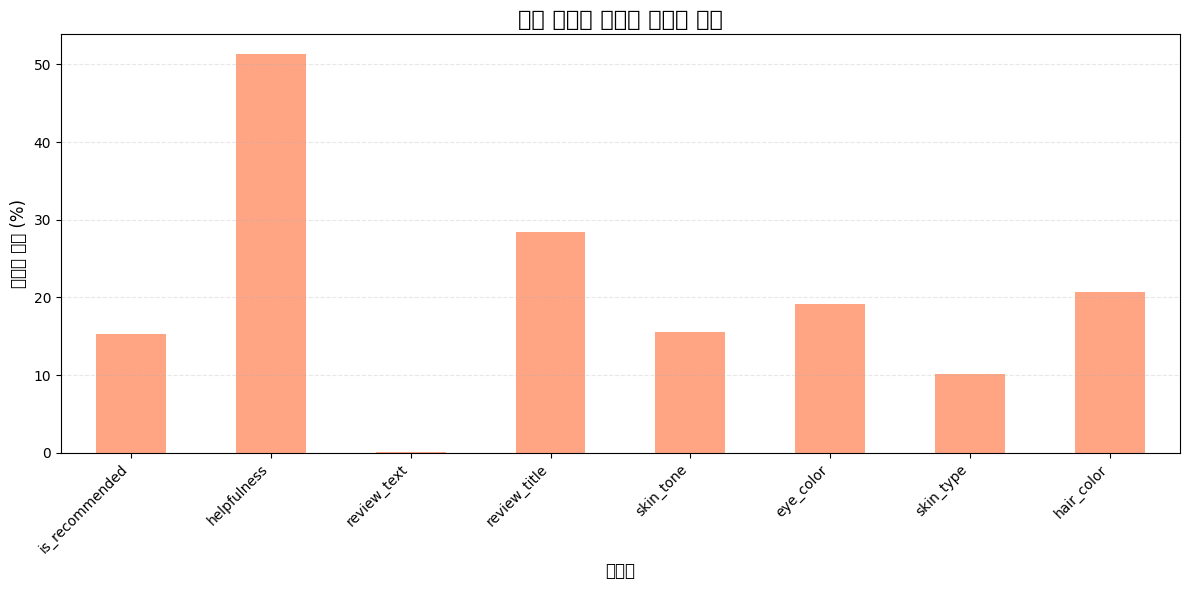

In [20]:
# ============================================================
# 4-3. 결측값 시각화
# ============================================================
# 막대 그래프로 결측값 비율을 시각적으로 확인합니다

# 그래프 크기 설정 (가로 12인치, 세로 6인치)
plt.figure(figsize=(12, 6))

# 리뷰 데이터의 결측값 비율 막대 그래프
# 결측값이 있는 컬럼만 선택
missing_cols = missing_reviews_percent[missing_reviews_percent > 0]

# .plot(kind='bar'): 막대 그래프 그리기
# color: 막대 색상
# alpha: 투명도 (0=완전 투명, 1=불투명)
missing_cols.plot(kind='bar', color='coral', alpha=0.7)

# 그래프 제목 설정
plt.title('리뷰 데이터 컬럼별 결측값 비율', fontsize=16, fontweight='bold')

# x축, y축 라벨 설정
plt.xlabel('컬럼명', fontsize=12)
plt.ylabel('결측값 비율 (%)', fontsize=12)

# x축 라벨을 45도 회전 (이름이 겹치지 않도록)
plt.xticks(rotation=45, ha='right')

# 격자 추가 (y축만, 점선으로)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 레이아웃 자동 조정 (라벨이 잘리지 않도록)
plt.tight_layout()

# 그래프 출력
plt.show()

In [21]:
# ============================================================
# 4-4. 제품 데이터 결측값 처리
# ============================================================

print("🛠️ 제품 데이터 결측값 처리 중...\n")

# 원본 데이터 복사 (원본을 보존하기 위해)
# .copy()를 사용하지 않으면 원본도 같이 변경됩니다
products_clean = products_df.copy()

# 1. 가격 결측값 처리
# 가격이 없는 제품은 분석이 어려우므로 해당 행 삭제
if 'price_usd' in products_clean.columns:
    before_count = len(products_clean)
    
    # .dropna(): 결측값이 있는 행을 삭제
    # subset: 특정 컬럼만 확인
    products_clean = products_clean.dropna(subset=['price_usd'])
    
    after_count = len(products_clean)
    print(f"✓ 가격(price_usd) 결측값 제거: {before_count - after_count}개 행 삭제")

# 2. 평점 결측값 처리
# 평점이 없는 경우 0으로 채우기 (리뷰가 없다는 의미)
if 'rating' in products_clean.columns:
    missing_count = products_clean['rating'].isnull().sum()
    
    # .fillna(값): 결측값을 특정 값으로 채우기
    products_clean['rating'].fillna(0, inplace=True)
    
    print(f"✓ 평점(rating) 결측값 0으로 채움: {missing_count}개")

# 3. 리뷰 수 결측값 처리
if 'reviews' in products_clean.columns:
    missing_count = products_clean['reviews'].isnull().sum()
    products_clean['reviews'].fillna(0, inplace=True)
    print(f"✓ 리뷰수(reviews) 결측값 0으로 채움: {missing_count}개")

# 4. 텍스트 컬럼 결측값 처리
# 텍스트 컬럼은 빈 문자열로 채우기
text_columns = ['ingredients', 'highlights', 'variation_desc']
for col in text_columns:
    if col in products_clean.columns:
        missing_count = products_clean[col].isnull().sum()
        products_clean[col].fillna('', inplace=True)
        print(f"✓ {col} 결측값 빈 문자열로 채움: {missing_count}개")

print(f"\n✅ 제품 데이터 결측값 처리 완료!")
print(f"   최종 제품 수: {len(products_clean):,}개")

🛠️ 제품 데이터 결측값 처리 중...

✓ 가격(price_usd) 결측값 제거: 0개 행 삭제
✓ 평점(rating) 결측값 0으로 채움: 278개
✓ 리뷰수(reviews) 결측값 0으로 채움: 278개
✓ ingredients 결측값 빈 문자열로 채움: 945개
✓ highlights 결측값 빈 문자열로 채움: 2207개
✓ variation_desc 결측값 빈 문자열로 채움: 7244개

✅ 제품 데이터 결측값 처리 완료!
   최종 제품 수: 8,494개


In [22]:
# ============================================================
# 4-5. 리뷰 데이터 결측값 처리
# ============================================================

print("🛠️ 리뷰 데이터 결측값 처리 중...\n")

reviews_clean = reviews_df.copy()

# 1. 필수 컬럼(평점, 리뷰 텍스트)이 없는 행 삭제
# 평점과 리뷰 텍스트가 없으면 의미 있는 분석이 불가능
before_count = len(reviews_clean)

# dropna()에 여러 컬럼을 리스트로 전달하면 그 중 하나라도 결측이면 삭제
reviews_clean = reviews_clean.dropna(subset=['rating', 'review_text'])

after_count = len(reviews_clean)
print(f"✓ 필수 컬럼(rating, review_text) 결측값 제거: {before_count - after_count:,}개 행 삭제")

# 2. is_recommended 결측값 처리
# 추천 여부를 알 수 없는 경우 0으로 설정 (미추천으로 간주)
if 'is_recommended' in reviews_clean.columns:
    missing_count = reviews_clean['is_recommended'].isnull().sum()
    reviews_clean['is_recommended'].fillna(0, inplace=True)
    print(f"✓ 추천여부(is_recommended) 결측값 0으로 채움: {missing_count:,}개")

# 3. 피부 정보 결측값 처리
# 피부 타입, 피부 톤 등은 'unknown'으로 채우기
skin_columns = ['skin_type', 'skin_tone', 'eye_color', 'hair_color']
for col in skin_columns:
    if col in reviews_clean.columns:
        missing_count = reviews_clean[col].isnull().sum()
        reviews_clean[col].fillna('unknown', inplace=True)
        print(f"✓ {col} 결측값 'unknown'으로 채움: {missing_count:,}개")

# 4. helpfulness 관련 컬럼 결측값 처리
# 도움됨 관련 수치는 0으로 채우기
helpfulness_cols = ['helpfulness', 'total_feedback_count', 'total_pos_feedback_count', 'total_neg_feedback_count']
for col in helpfulness_cols:
    if col in reviews_clean.columns:
        missing_count = reviews_clean[col].isnull().sum()
        reviews_clean[col].fillna(0, inplace=True)
        print(f"✓ {col} 결측값 0으로 채움: {missing_count:,}개")

print(f"\n✅ 리뷰 데이터 결측값 처리 완료!")
print(f"   최종 리뷰 수: {len(reviews_clean):,}개")

🛠️ 리뷰 데이터 결측값 처리 중...

✓ 필수 컬럼(rating, review_text) 결측값 제거: 1,444개 행 삭제
✓ 추천여부(is_recommended) 결측값 0으로 채움: 167,988개
✓ skin_type 결측값 'unknown'으로 채움: 111,518개
✓ skin_tone 결측값 'unknown'으로 채움: 170,499개
✓ eye_color 결측값 'unknown'으로 채움: 209,566개
✓ hair_color 결측값 'unknown'으로 채움: 226,718개
✓ helpfulness 결측값 0으로 채움: 560,595개
✓ total_feedback_count 결측값 0으로 채움: 0개
✓ total_pos_feedback_count 결측값 0으로 채움: 0개
✓ total_neg_feedback_count 결측값 0으로 채움: 0개

✅ 리뷰 데이터 결측값 처리 완료!
   최종 리뷰 수: 1,092,967개


---
## 5. 데이터 타입 변환

### 데이터 타입이란?
- 데이터의 종류를 말합니다
- Python/Pandas의 주요 데이터 타입:
  - **int**: 정수 (1, 2, 3, ...)
  - **float**: 실수 (3.14, 2.5, ...)
  - **str (object)**: 문자열 ("안녕", "hello", ...)
  - **datetime**: 날짜/시간
  - **bool**: 참/거짓 (True, False)

### 왜 데이터 타입을 변환할까?
- 올바른 타입이어야 계산이 가능합니다
- 예: 가격이 문자열로 저장되어 있으면 평균을 구할 수 없습니다

In [34]:
# ============================================================
# 5-1. 제품 데이터 타입 변환
# ============================================================

print("🔄 제품 데이터 타입 변환 중...\n")

# 1. 가격을 숫자형(float)으로 변환
if 'price_usd' in products_clean.columns:
    # pd.to_numeric(): 문자열을 숫자로 변환
    # errors='coerce': 변환 불가능한 값은 NaN으로 처리
    products_clean['price_usd'] = pd.to_numeric(products_clean['price_usd'], errors='coerce')
    print(f"✓ price_usd를 숫자형(float)으로 변환")

# 2. 평점을 숫자형(float)으로 변환
if 'rating' in products_clean.columns:
    products_clean['rating'] = pd.to_numeric(products_clean['rating'], errors='coerce')
    print(f"✓ rating을 숫자형(float)으로 변환")

# 3. 리뷰 수를 정수형(int)으로 변환
if 'reviews' in products_clean.columns:
    products_clean['reviews'] = pd.to_numeric(products_clean['reviews'], errors='coerce').fillna(0).astype(int)
    print(f"✓ reviews를 정수형(int)으로 변환")

# 4. loves_count를 정수형으로 변환
if 'loves_count' in products_clean.columns:
    products_clean['loves_count'] = pd.to_numeric(products_clean['loves_count'], errors='coerce').fillna(0).astype(int)
    print(f"✓ loves_count를 정수형(int)으로 변환")

# 5. 불리언(True/False) 컬럼 변환
boolean_cols = ['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']
for col in boolean_cols:
    if col in products_clean.columns:
        # .astype(bool): 불리언 타입으로 변환
        products_clean[col] = products_clean[col].astype(bool)
        print(f"✓ {col}을 불리언(bool)으로 변환")

print("\n✅ 제품 데이터 타입 변환 완료!")

🔄 제품 데이터 타입 변환 중...

✓ price_usd를 숫자형(float)으로 변환
✓ rating을 숫자형(float)으로 변환
✓ reviews를 정수형(int)으로 변환
✓ loves_count를 정수형(int)으로 변환
✓ limited_edition을 불리언(bool)으로 변환
✓ new을 불리언(bool)으로 변환
✓ online_only을 불리언(bool)으로 변환
✓ out_of_stock을 불리언(bool)으로 변환
✓ sephora_exclusive을 불리언(bool)으로 변환

✅ 제품 데이터 타입 변환 완료!


In [24]:
# ============================================================
# 5-2. 리뷰 데이터 타입 변환
# ============================================================

print("🔄 리뷰 데이터 타입 변환 중...\n")

# 1. 평점을 정수형으로 변환
if 'rating' in reviews_clean.columns:
    reviews_clean['rating'] = pd.to_numeric(reviews_clean['rating'], errors='coerce').fillna(0).astype(int)
    print(f"✓ rating을 정수형(int)으로 변환")

# 2. 추천 여부를 불리언으로 변환
if 'is_recommended' in reviews_clean.columns:
    reviews_clean['is_recommended'] = reviews_clean['is_recommended'].astype(bool)
    print(f"✓ is_recommended를 불리언(bool)으로 변환")

# 3. 날짜 컬럼을 datetime 타입으로 변환
if 'submission_time' in reviews_clean.columns:
    # pd.to_datetime(): 문자열을 날짜 타입으로 변환
    reviews_clean['submission_time'] = pd.to_datetime(reviews_clean['submission_time'], errors='coerce')
    print(f"✓ submission_time을 datetime으로 변환")

# 4. helpfulness 관련 컬럼을 숫자형으로 변환
numeric_cols = ['helpfulness', 'total_feedback_count', 'total_pos_feedback_count', 'total_neg_feedback_count']
for col in numeric_cols:
    if col in reviews_clean.columns:
        reviews_clean[col] = pd.to_numeric(reviews_clean[col], errors='coerce').fillna(0)
        print(f"✓ {col}을 숫자형(float)으로 변환")

print("\n✅ 리뷰 데이터 타입 변환 완료!")

🔄 리뷰 데이터 타입 변환 중...

✓ rating을 정수형(int)으로 변환
✓ is_recommended를 불리언(bool)으로 변환
✓ submission_time을 datetime으로 변환
✓ helpfulness을 숫자형(float)으로 변환
✓ total_feedback_count을 숫자형(float)으로 변환
✓ total_pos_feedback_count을 숫자형(float)으로 변환
✓ total_neg_feedback_count을 숫자형(float)으로 변환

✅ 리뷰 데이터 타입 변환 완료!


---
## 6. 텍스트 데이터 전처리

### 텍스트 전처리가 필요한 이유:
- 텍스트 데이터는 그대로 사용하기 어렵습니다
- 불필요한 문자, 공백 등을 제거해야 분석이 가능합니다

### 텍스트 전처리 단계:
1. 불필요한 공백 제거
2. 특수문자 제거 (필요한 경우)
3. 대소문자 통일
4. 텍스트 길이 계산

In [25]:
# ============================================================
# 6-1. 리뷰 텍스트 전처리
# ============================================================

print("📝 리뷰 텍스트 전처리 중...\n")

# 1. 리뷰 텍스트 앞뒤 공백 제거
if 'review_text' in reviews_clean.columns:
    # .str.strip(): 문자열 앞뒤의 공백 제거
    # pandas에서 문자열 메서드를 사용하려면 .str을 붙여야 합니다
    reviews_clean['review_text'] = reviews_clean['review_text'].str.strip()
    print("✓ 리뷰 텍스트 앞뒤 공백 제거")

# 2. 리뷰 제목 앞뒤 공백 제거
if 'review_title' in reviews_clean.columns:
    reviews_clean['review_title'] = reviews_clean['review_title'].fillna('').str.strip()
    print("✓ 리뷰 제목 앞뒤 공백 제거")

# 3. 리뷰 텍스트 길이 계산 (파생 변수 생성)
# 파생 변수: 기존 데이터에서 계산해서 만든 새로운 변수
if 'review_text' in reviews_clean.columns:
    # .str.len(): 문자열의 길이(글자 수)를 계산
    reviews_clean['review_length'] = reviews_clean['review_text'].str.len()
    print("✓ 리뷰 텍스트 길이(review_length) 계산")
    print(f"   - 평균 리뷰 길이: {reviews_clean['review_length'].mean():.1f}자")
    print(f"   - 최소 리뷰 길이: {reviews_clean['review_length'].min()}자")
    print(f"   - 최대 리뷰 길이: {reviews_clean['review_length'].max()}자")

# 4. 너무 짧은 리뷰 제거 (10자 미만)
# 너무 짧은 리뷰는 의미 있는 정보가 적을 가능성이 높습니다
if 'review_length' in reviews_clean.columns:
    before_count = len(reviews_clean)
    
    # 조건: review_length >= 10
    # [조건]을 사용하여 조건에 맞는 행만 선택
    reviews_clean = reviews_clean[reviews_clean['review_length'] >= 10]
    
    after_count = len(reviews_clean)
    print(f"\n✓ 너무 짧은 리뷰(10자 미만) 제거: {before_count - after_count:,}개")

print("\n✅ 텍스트 전처리 완료!")

📝 리뷰 텍스트 전처리 중...

✓ 리뷰 텍스트 앞뒤 공백 제거
✓ 리뷰 제목 앞뒤 공백 제거
✓ 리뷰 텍스트 길이(review_length) 계산
   - 평균 리뷰 길이: 320.6자
   - 최소 리뷰 길이: 8자
   - 최대 리뷰 길이: 6448자

✓ 너무 짧은 리뷰(10자 미만) 제거: 1개

✅ 텍스트 전처리 완료!


In [26]:
# ============================================================
# 6-2. 제품 성분 데이터 전처리
# ============================================================

print("🧪 제품 성분 데이터 전처리 중...\n")

if 'ingredients' in products_clean.columns:
    # 성분 데이터는 리스트 형태의 문자열로 저장되어 있습니다
    # 예: "['Water', 'Glycerin', 'Butylene Glycol']"
    
    # 성분 개수 계산
    # 쉼표(,)의 개수를 세어서 성분 개수를 추정
    products_clean['ingredient_count'] = products_clean['ingredients'].str.count(',') + 1
    
    # 빈 문자열인 경우 0으로 설정
    products_clean.loc[products_clean['ingredients'] == '', 'ingredient_count'] = 0
    
    print("✓ 성분 개수(ingredient_count) 계산")
    print(f"   - 평균 성분 개수: {products_clean['ingredient_count'].mean():.1f}개")
    print(f"   - 최소 성분 개수: {products_clean['ingredient_count'].min():.0f}개")
    print(f"   - 최대 성분 개수: {products_clean['ingredient_count'].max():.0f}개")

print("\n✅ 성분 데이터 전처리 완료!")

🧪 제품 성분 데이터 전처리 중...

✓ 성분 개수(ingredient_count) 계산
   - 평균 성분 개수: 31.4개
   - 최소 성분 개수: 0개
   - 최대 성분 개수: 720개

✅ 성분 데이터 전처리 완료!


---
## 7. 파생 변수 생성

### 파생 변수(Derived Variable)란?
- 기존 데이터를 가공하여 만든 새로운 변수입니다
- 분석이나 머신러닝에 더 유용한 정보를 제공합니다

### 파생 변수의 예:
- 가격 구간 (저가/중가/고가)
- 리뷰 작성 년도/월
- 인기도 점수

In [27]:
# ============================================================
# 7-1. 제품 가격 카테고리 생성
# ============================================================

print("💰 가격 카테고리 생성 중...\n")

if 'price_usd' in products_clean.columns:
    # 가격 분포 확인
    price_quartiles = products_clean['price_usd'].quantile([0.25, 0.5, 0.75])
    print("가격 분포:")
    print(f"  25% 지점(Q1): ${price_quartiles[0.25]:.2f}")
    print(f"  50% 지점(중간값): ${price_quartiles[0.5]:.2f}")
    print(f"  75% 지점(Q3): ${price_quartiles[0.75]:.2f}")
    
    # pd.cut(): 연속된 숫자를 구간으로 나누기
    # bins: 구간의 경계값
    # labels: 각 구간에 붙일 이름
    products_clean['price_category'] = pd.cut(
        products_clean['price_usd'],
        bins=[0, 25, 50, 100, float('inf')],
        labels=['저가($0-25)', '중저가($25-50)', '중고가($50-100)', '고가($100+)']
    )
    
    print("\n✓ 가격 카테고리 생성 완료")
    print("\n가격 카테고리별 제품 수:")
    # .value_counts(): 각 값의 빈도수를 계산
    print(products_clean['price_category'].value_counts())

print("\n" + "="*80)

💰 가격 카테고리 생성 중...

가격 분포:
  25% 지점(Q1): $25.00
  50% 지점(중간값): $35.00
  75% 지점(Q3): $58.00

✓ 가격 카테고리 생성 완료

가격 카테고리별 제품 수:
price_category
중저가($25-50)     3707
저가($0-25)       2314
중고가($50-100)    1575
고가($100+)        898
Name: count, dtype: int64



In [28]:
# ============================================================
# 7-2. 제품 인기도 점수 생성
# ============================================================

print("⭐ 제품 인기도 점수 생성 중...\n")

# 인기도 = (평점 * 리뷰 수) + loves_count
# 평점이 높고 리뷰가 많으며 좋아요가 많을수록 인기도가 높습니다

if all(col in products_clean.columns for col in ['rating', 'reviews', 'loves_count']):
    products_clean['popularity_score'] = (
        products_clean['rating'] * products_clean['reviews'] + 
        products_clean['loves_count']
    )
    
    print("✓ 인기도 점수(popularity_score) 생성 완료")
    print(f"   - 평균 인기도: {products_clean['popularity_score'].mean():.1f}")
    print(f"   - 최대 인기도: {products_clean['popularity_score'].max():.1f}")
    
    # 가장 인기 있는 제품 TOP 5
    print("\n가장 인기 있는 제품 TOP 5:")
    top5 = products_clean.nlargest(5, 'popularity_score')[['product_name', 'brand_name', 'rating', 'reviews', 'popularity_score']]
    print(top5)

print("\n" + "="*80)

⭐ 제품 인기도 점수 생성 중...

✓ 인기도 점수(popularity_score) 생성 완료
   - 평균 인기도: 31037.9
   - 최대 인기도: 1422535.0

가장 인기 있는 제품 TOP 5:
                                           product_name  \
6242                            Soft Pinch Liquid Blush   
5249                           Radiant Creamy Concealer   
4431  Lip Sleeping Mask Intense Hydration with Vitam...   
6434                    Cream Lip Stain Liquid Lipstick   
2523                 Gloss Bomb Universal Lip Luminizer   

                       brand_name  rating  reviews  popularity_score  
6242  Rare Beauty by Selena Gomez  4.5356     4733      1.422535e+06  
5249                         NARS  4.3080    12887      1.209111e+06  
4431                      LANEIGE  4.3508    16118      1.151441e+06  
6434           SEPHORA COLLECTION  4.3201    11111      1.077052e+06  
2523      Fenty Beauty by Rihanna  4.6357    12136      1.024576e+06  



In [29]:
# ============================================================
# 7-3. 리뷰 날짜 관련 파생 변수 생성
# ============================================================

print("📅 리뷰 날짜 관련 변수 생성 중...\n")

if 'submission_time' in reviews_clean.columns:
    # 날짜에서 년도, 월, 요일 추출
    # .dt는 datetime 타입의 데이터에서 날짜/시간 정보를 추출할 때 사용
    reviews_clean['year'] = reviews_clean['submission_time'].dt.year
    reviews_clean['month'] = reviews_clean['submission_time'].dt.month
    reviews_clean['day_of_week'] = reviews_clean['submission_time'].dt.day_name()
    
    print("✓ 년도(year), 월(month), 요일(day_of_week) 추출")
    print(f"\n리뷰 년도 분포:")
    print(reviews_clean['year'].value_counts().sort_index())

print("\n" + "="*80)

📅 리뷰 날짜 관련 변수 생성 중...

✓ 년도(year), 월(month), 요일(day_of_week) 추출

리뷰 년도 분포:
year
2008      2761
2009      9708
2010     13485
2011     12417
2012     11800
2013     15621
2014     18224
2015     21590
2016     33137
2017     54592
2018     97996
2019    142440
2020    215449
2021    202012
2022    192227
2023     49507
Name: count, dtype: int64



In [30]:
# ============================================================
# 7-4. 리뷰 감성 카테고리 생성
# ============================================================

print("😊 리뷰 감성 카테고리 생성 중...\n")

if 'rating' in reviews_clean.columns:
    # 평점을 기준으로 감성 분류
    # 1-2점: 부정, 3점: 중립, 4-5점: 긍정
    
    def classify_sentiment(rating):
        """평점을 감성으로 분류하는 함수"""
        if rating <= 2:
            return '부정'
        elif rating == 3:
            return '중립'
        else:
            return '긍정'
    
    # .apply(): 각 행에 함수를 적용
    reviews_clean['sentiment'] = reviews_clean['rating'].apply(classify_sentiment)
    
    print("✓ 감성 카테고리(sentiment) 생성 완료")
    print("\n감성 분포:")
    sentiment_counts = reviews_clean['sentiment'].value_counts()
    print(sentiment_counts)
    print("\n비율:")
    print((sentiment_counts / len(reviews_clean) * 100).round(2))

print("\n" + "="*80)

😊 리뷰 감성 카테고리 생성 중...

✓ 감성 카테고리(sentiment) 생성 완료

감성 분포:
sentiment
긍정    897153
부정    114061
중립     81752
Name: count, dtype: int64

비율:
sentiment
긍정    82.08
부정    10.44
중립     7.48
Name: count, dtype: float64



---
## 8. 최종 데이터 확인

전처리가 모두 완료된 데이터를 확인합니다.

In [31]:
# ============================================================
# 8-1. 최종 제품 데이터 확인
# ============================================================

print("="*80)
print("📊 최종 제품 데이터 요약")
print("="*80)

print(f"\n🔢 데이터 크기: {products_clean.shape[0]:,}행 × {products_clean.shape[1]}열")
print(f"\n📋 컬럼 목록 ({len(products_clean.columns)}개):")
print(products_clean.columns.tolist())

print("\n💾 메모리 사용량:")
print(f"{products_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📈 기본 통계:")
print(products_clean[['price_usd', 'rating', 'reviews', 'loves_count', 'popularity_score']].describe())

📊 최종 제품 데이터 요약

🔢 데이터 크기: 8,494행 × 30열

📋 컬럼 목록 (30개):
['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count', 'rating', 'reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 'ingredients', 'price_usd', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'child_count', 'child_max_price', 'child_min_price', 'ingredient_count', 'price_category', 'popularity_score']

💾 메모리 사용량:
12.98 MB

📈 기본 통계:
         price_usd       rating       reviews   loves_count  popularity_score
count  8494.000000  8494.000000   8494.000000  8.494000e+03      8.494000e+03
mean     51.655595     4.057231    433.865081  2.917957e+04      3.103786e+04
std      53.669234     0.902931   1086.731772  6.609212e+04      6.938359e+04
min       3.000000     0.000000      0.000000  0.000000e+00      0.000000e+00
25%      25.000000     3.925400     2

In [32]:
# ============================================================
# 8-2. 최종 리뷰 데이터 확인
# ============================================================

print("="*80)
print("📊 최종 리뷰 데이터 요약")
print("="*80)

print(f"\n🔢 데이터 크기: {reviews_clean.shape[0]:,}행 × {reviews_clean.shape[1]}열")
print(f"\n📋 컬럼 목록 ({len(reviews_clean.columns)}개):")
print(reviews_clean.columns.tolist())

print("\n💾 메모리 사용량:")
print(f"{reviews_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📈 기본 통계:")
print(reviews_clean[['rating', 'helpfulness', 'review_length']].describe())

📊 최종 리뷰 데이터 요약

🔢 데이터 크기: 1,092,966행 × 24열

📋 컬럼 목록 (24개):
['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name', 'brand_name', 'price_usd', 'review_length', 'year', 'month', 'day_of_week', 'sentiment']

💾 메모리 사용량:
1444.54 MB

📈 기본 통계:
             rating   helpfulness  review_length
count  1.092966e+06  1.092966e+06   1.092966e+06
mean   4.299152e+00  3.742263e-01   3.205772e+02
std    1.149286e+00  4.430841e-01   2.314447e+02
min    1.000000e+00  0.000000e+00   1.600000e+01
25%    4.000000e+00  0.000000e+00   1.720000e+02
50%    5.000000e+00  0.000000e+00   2.630000e+02
75%    5.000000e+00  9.145623e-01   4.020000e+02
max    5.000000e+00  1.000000e+00   6.448000e+03


---
## 9. 전처리된 데이터 저장

### 데이터를 저장하는 이유:
- 전처리는 시간이 오래 걸립니다
- 한 번 전처리한 데이터를 저장해두면 다음에 바로 사용할 수 있습니다
- 다른 노트북에서도 사용할 수 있습니다

In [33]:
# ============================================================
# 9-1. CSV 파일로 저장
# ============================================================

print("💾 전처리된 데이터를 저장하는 중...\n")

# to_csv(): DataFrame을 CSV 파일로 저장
# index=False: 인덱스(행 번호)는 저장하지 않음
# encoding='utf-8-sig': 한글이 깨지지 않도록 인코딩 설정

# 제품 데이터 저장
products_clean.to_csv('cleaned_products.csv', index=False, encoding='utf-8-sig')
print("✅ 제품 데이터 저장 완료: cleaned_products.csv")
print(f"   - 크기: {products_clean.shape[0]:,}행 × {products_clean.shape[1]}열")

# 리뷰 데이터 저장
print("\n⏳ 리뷰 데이터 저장 중 (용량이 커서 시간이 걸릴 수 있습니다)...")
reviews_clean.to_csv('cleaned_reviews.csv', index=False, encoding='utf-8-sig')
print("✅ 리뷰 데이터 저장 완료: cleaned_reviews.csv")
print(f"   - 크기: {reviews_clean.shape[0]:,}행 × {reviews_clean.shape[1]}열")

print("\n" + "="*80)
print("🎉 데이터 전처리 완료!")
print("="*80)
print("\n다음 단계: 02_exploratory_analysis.ipynb에서 데이터 분석 시작!")

💾 전처리된 데이터를 저장하는 중...

✅ 제품 데이터 저장 완료: cleaned_products.csv
   - 크기: 8,494행 × 30열

⏳ 리뷰 데이터 저장 중 (용량이 커서 시간이 걸릴 수 있습니다)...
✅ 리뷰 데이터 저장 완료: cleaned_reviews.csv
   - 크기: 1,092,966행 × 24열

🎉 데이터 전처리 완료!

다음 단계: 02_exploratory_analysis.ipynb에서 데이터 분석 시작!


---
## 💡 학습 요약

이 노트북에서 배운 내용:

### 1. 데이터 로딩
- `pd.read_csv()`: CSV 파일 읽기
- `pd.concat()`: 여러 DataFrame 합치기

### 2. 데이터 탐색
- `.head()`: 데이터 미리보기
- `.info()`: 데이터 구조 확인
- `.describe()`: 기본 통계량 확인
- `.shape`: 데이터 크기 확인

### 3. 결측값 처리
- `.isnull()`: 결측값 확인
- `.dropna()`: 결측값이 있는 행 삭제
- `.fillna()`: 결측값을 특정 값으로 채우기

### 4. 데이터 타입 변환
- `pd.to_numeric()`: 숫자형으로 변환
- `pd.to_datetime()`: 날짜형으로 변환
- `.astype()`: 타입 변환

### 5. 텍스트 처리
- `.str.strip()`: 공백 제거
- `.str.len()`: 길이 계산

### 6. 파생 변수 생성
- `pd.cut()`: 구간 나누기
- `.apply()`: 함수 적용

### 7. 데이터 저장
- `.to_csv()`: CSV 파일로 저장

---

## 🎯 다음 단계

전처리가 완료된 데이터로 다음 분석을 진행할 수 있습니다:

1. **02_exploratory_analysis.ipynb**: 데이터 시각화 및 패턴 분석
2. **03_ml_rating_prediction.ipynb**: 제품 평점 예측 모델
3. **04_ml_sentiment_analysis.ipynb**: 리뷰 감성 분석
4. **05_ml_recommendation_system.ipynb**: 제품 추천 시스템
5. **06_ml_review_helpfulness.ipynb**: 리뷰 유용성 예측

---